# Proyek Analisis Data : Bike-sharing-dataset
- Nama      : Sri Mutia
- Email     : srimutia2121@gmail.com
- Cohort ID : MC130D5X0188


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import pearsonr

# Data Wrangling

## Gathering Data

## Membuat tabel hour

In [ ]:
hours_df = pd.read_csv("data\hour.csv")
hours_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1323302674.py:1: SyntaxWarning: invalid escape sequence '\h'
  hours_df = pd.read_csv("Files\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Membuat tabel day

In [ ]:
days_df = pd.read_csv("data\day.csv")
days_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1203308814.py:1: SyntaxWarning: invalid escape sequence '\d'
  days_df = pd.read_csv("Files\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdiri dari dua dataset, yaitu : hour.csv dan day.csv 
- Dataset hour berisi informasi jumlah penyewaan sepeda yang dikumpulkan per jam
- Dataset day berisi informasi jumlah penyewaan sepeda yang dikumpulkan per hari

# Assesing Data
## Menilai Data hours_df

In [6]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada hours_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom 'dteday'. Kolom tersebut seharusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**(karena ini untuk tipe data string)

Selanjutnya memeriksa duplikasi data

In [7]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi nilai pada hour_df

In [8]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Terdapat keanehan pada nilai minimum kolom hum yaitu 0, dan itu tidak masuk akal.

## Menilai data days_df

In [9]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data days_df telah lengkap jadi tidak ada missing value. Akan tetapi, terdapat kesalahan tipe data pada kolom 'dteday'. Seharusnya komlom tersebut direpresentasikan sebagai tipe data **datetime**, buka **object**

Selanjutnya kita akan memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada days_df

In [10]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())
days_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data ini menunjukkan tidak terdapat duplikasi tetapi terdapat kenehan pada kolom hum yang memiliki nilai minimum 0, dan itu tidak masuk akal

**Insight:**
- Pada data hours_df terdapat kesalahan tipe data pada kolom dteday dan terdapat inaccurate value pada kolom hum
- Pada data days_df terdapat kesalahan tipe data pada kolom dteday dan terdapat inaccurate value pada kolom hum


# Cleaning Data
## 1.Membersihkan Data hours_df


Berdasarkan hasil assesing data, terdapat dua masalah pada data hours_df yaitu, kesalahan tipe data dan inacurate value. Pertama kita akan memperbaiki kesalahan tipe data dengan megganti tipe data kolom dteday dari object menjadi datetime

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hours_df[column] = pd.to_datetime(hours_df[column])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Selanjutnya kita akan memperbaiki masalah inaccurate value pada kolom hum. Pertama kita akan melihat baris data yang berisi nilai minimum

In [12]:
hours_df[hours_df.hum == hours_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


Berdasarkan data tersebut kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena humman error. Untuk menangani hal ini, kita akan menggantinya dengan nilai 0.52. 

In [13]:
hours_df.hum.replace(hours_df.hum.min(), 0.52, inplace=True)

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\3017039241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.hum.replace(hours_df.hum.min(), 0.52, inplace=True)


## 2. Membersihkan data days_df
Berdasarkan hasil assesing data pada days_df, terdapat 2 masalah yang ditemui yaitu, kesalahan pada tipe data dan inaccurate value. Pertama kita akan memperbaiki kesalahan pada tipe data.

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Selanjutnya kita akan memperbaiki kesalahan inaccurate value yang terjadi pada kolom hum. Terdapat nilai minimum yang tidak masuk akal yaitu 0, mungkin terjadi kesalahan karena human error. Dengan itu kita akan mengggantikannya dengan nilai 0.52.

In [15]:
days_df[days_df.hum == days_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [16]:
days_df.hum.replace(days_df.hum.min(),0.52,inplace=True)

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\180326832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.hum.replace(days_df.hum.min(),0.52,inplace=True)


**Insight:**
- Setelah perbaikan, tipe data kolom 'dteday' pada kedua tabel hours_df dan days_df dari sebelumnya bertipe data object (untuk tipe data string) berubah menjadi tipe data datetime untuk tipe data berupa tanggal.
- Kelembapan pada kolom hum telah diubah nilai minimumnya dari bernilai 0 menjadi 0.52, menjadi nilai yang lebih masuk akal dan realistis


# Exploratory Data Analysis
## Menentukan Pertanyaan Bisnis
- Bagaimana penggunaan sepeda berubah seiring dengan variasi musim dan kondisi cuaca?
- Bagimana perbedaan perilaku penyewaan sepeda antara hari kerja, hari libur dan akhir pekan. Dan bagaimana pula perbedaan perilaku penyewaan sepeda antara pengguna casual dan pengguna registered berdasarkan tipe hari?
- Faktor-faktor apa saja yang memiliki pengeruh terbesar terhadap intensitas penyewaan sepeda?


# Melakukan Eksplorasi Data
## Eksplorasi Data hours_df
Pertama, kita akan mengeksplorasi data hours_df terlebih dahulu. Kita akan melihat rangkuman parameter statistik dari data hours_df menggunakan method describe()

In [17]:
hours_df.describe(include="all")

# Menunjukkan rata-rata penyewaan sepeda di setiap musim
print(hours_df.groupby('season')['cnt'].mean().reset_index())
# Menunjukkan rata-rata penyewaan sepeda berdasarkan jam
hourly_rentals = hours_df.groupby('hr')['cnt'].mean().reset_index()
# Menampilkan rata-rata penyewaan berdasarkan cuaca
weathersit_rentals = hours_df.groupby('weathersit')['cnt'].mean().reset_index()

   season         cnt
0       1  111.114569
1       2  208.344069
2       3  236.016237
3       4  198.868856


Dari data ini dapat dilihat bahwa ada pola atau perbedaan perilaku terhadap penyewaan sepeda pada masing-masing jam, musim, cuaca, dll

Kemudian kita akan melakukan eksplorasi pada data days_df
# Eksplorasi Data days_df
Berikut adalah rangkuman statistik dari data days_df



In [18]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628605,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140575,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan hasil tersebut, kita dapat melihat distribusi jumlah penyewaan sepeda, tren berdasarkan musim, serta pola berdasarkan hari kerja ,hari libur, dan akhir pekan.

### Interpretasi Variabel Kategoris

In [19]:
# Membuat fungsi untuk menjabarkan variabel kategorik
def interpret_categorical(df):
    print("### Interpretasi Variabel Season ###")
    print("1: Spring, 2: Summer, 3: Fall, 4: Winter")
    print(df['season'].value_counts().sort_index())

    print("\n### Interpretasi Variabel Weathersit ###")
    print("1: Clear/Partly cloudy")
    print("2: Mist/Cloudy")
    print("3: Light Snow/Rain")
    print("4: Heavy Rain/Snow/Fog")
    print(df['weathersit'].value_counts().sort_index())

    print("\n### Distribusi Hari Dalam Seminggu ###")
    print("0: Sunday, 1: Monday, ..., 6: Saturday")
    print(df['weekday'].value_counts().sort_index())

    print("\n### Distribusi Hari Kerja vs Libur ###")
    print("0: Weekend/Holiday, 1: Working Day")
    print(df['workingday'].value_counts())

    print("\n### Distribusi Hari Libur ###")
    print("0: Not Holiday, 1: Holiday")
    print(df['holiday'].value_counts())

interpret_categorical(days_df)

### Interpretasi Variabel Season ###
1: Spring, 2: Summer, 3: Fall, 4: Winter
season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

### Interpretasi Variabel Weathersit ###
1: Clear/Partly cloudy
2: Mist/Cloudy
3: Light Snow/Rain
4: Heavy Rain/Snow/Fog
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

### Distribusi Hari Dalam Seminggu ###
0: Sunday, 1: Monday, ..., 6: Saturday
weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

### Distribusi Hari Kerja vs Libur ###
0: Weekend/Holiday, 1: Working Day
workingday
1    500
0    231
Name: count, dtype: int64

### Distribusi Hari Libur ###
0: Not Holiday, 1: Holiday
holiday
0    710
1     21
Name: count, dtype: int64


**Insight:**
- Penyewaan sepeda sangat fluktuatif tergantung waktu (jam), dengan puncak pada jam kerja
- Sebagian besar penyewaan berasal dari pengguna terdaftar (registerd).
- Cuaca, suhu dan kelembapan ikut mempengaruhi seberapa aktif penyewaan baik itu data perjam maupun data harian.
- Musim gugur mempunyai volume tertinggi penyewaan
- Cuaca Clear/Partly cloudy mendrong lebih banyak penyewaan


# Membuat Visualisasi Data
Membuat visusalisasi data yang menjawab pertanyaan bisnis

### Pertanyaan 1 : Bagaimana penggunaan sepeda berubah seiring dengan variasi musim dan kondisi cuaca?

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\2505319576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=days_df, palette='Spectral', estimator='mean')
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


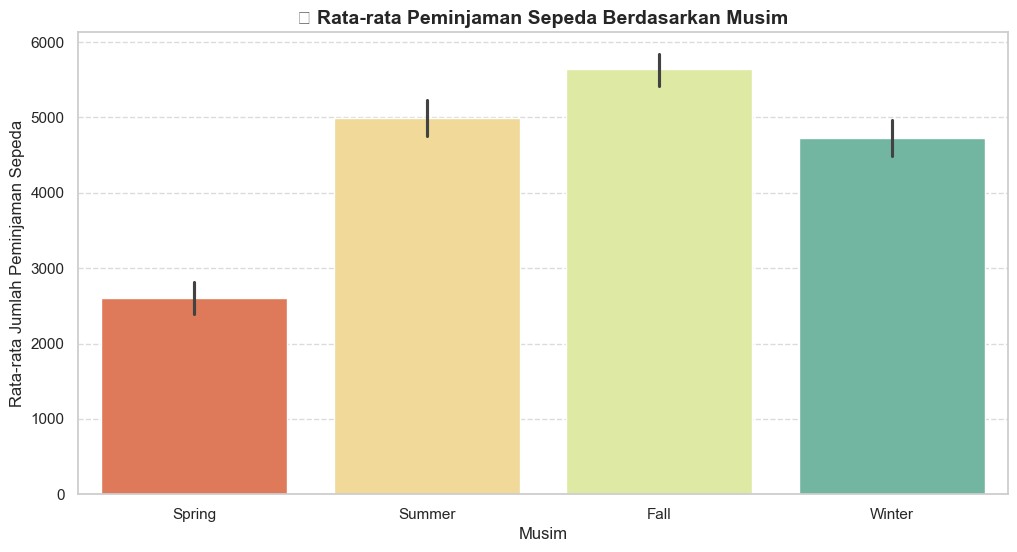

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\2505319576.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=days_df, palette='mako', estimator='mean')
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


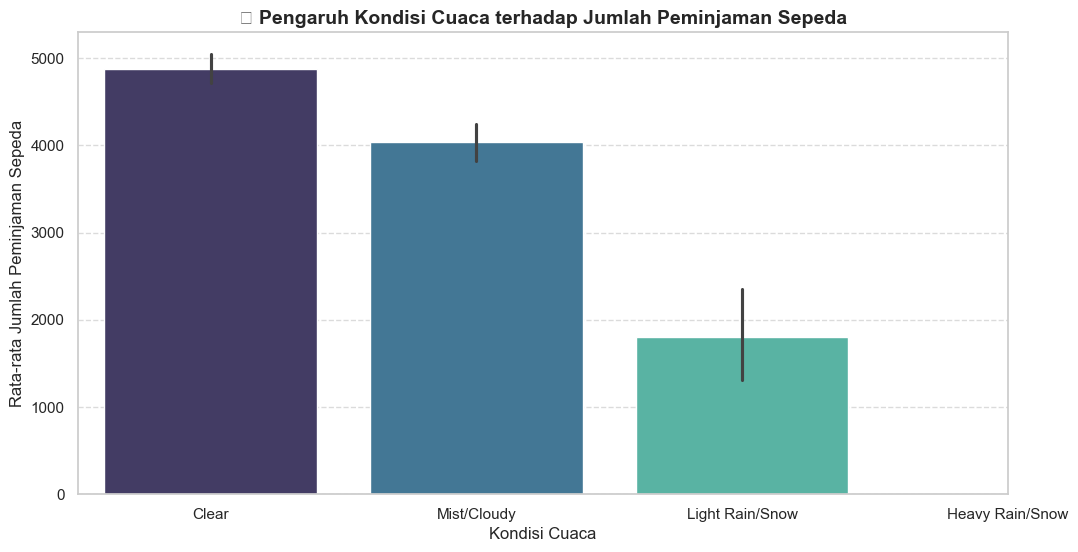

C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


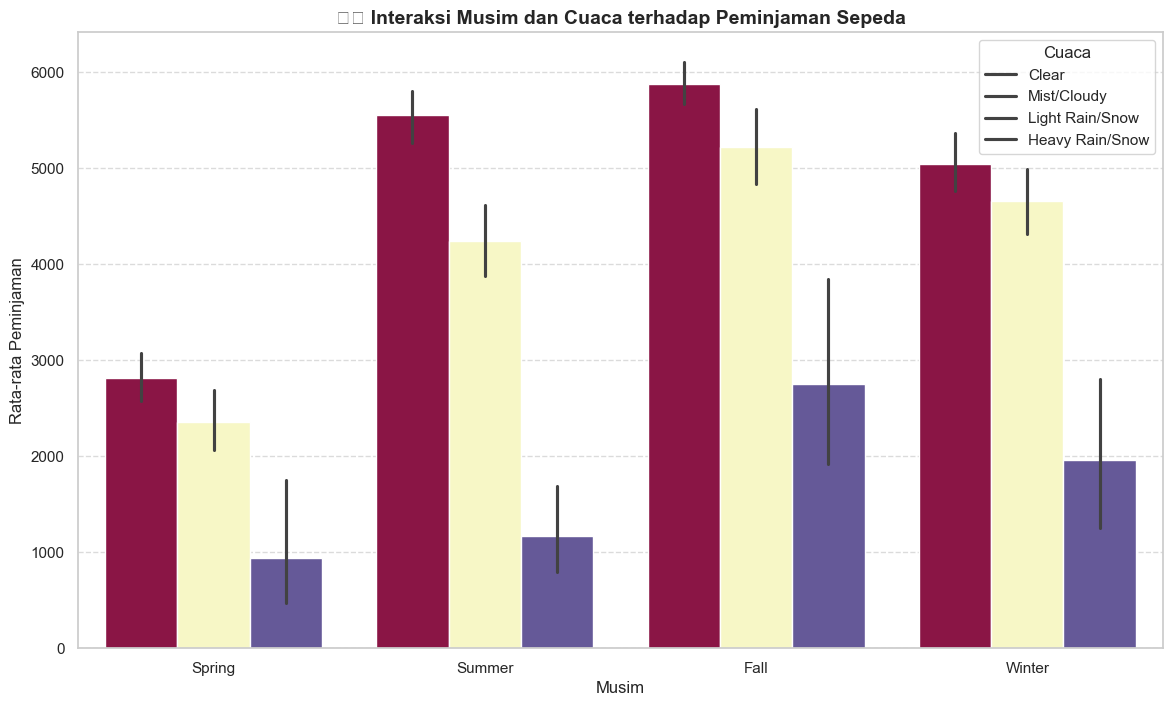

C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


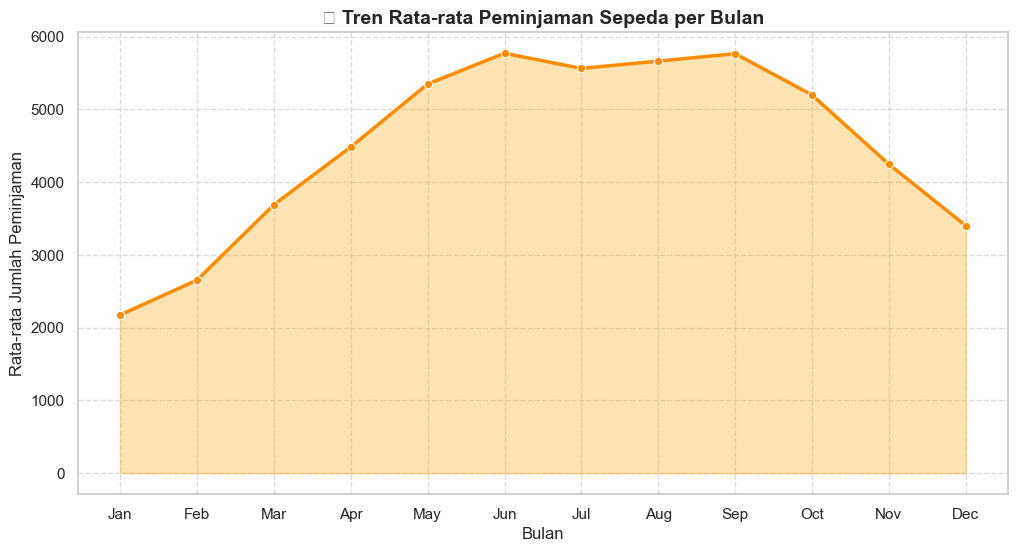

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur tema seaborn agar tampil lebih elegan
sns.set_theme(style="whitegrid")

# 1. Visualisasi peminjaman berdasarkan musim
plt.figure(figsize=(12,6))
sns.barplot(x='season', y='cnt', data=days_df, palette='Spectral', estimator='mean')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda', fontsize=12)
plt.title('📈 Rata-rata Peminjaman Sepeda Berdasarkan Musim', fontsize=14, weight='bold')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Visualisasi peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(12,6))
sns.barplot(x='weathersit', y='cnt', data=days_df, palette='mako', estimator='mean')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda', fontsize=12)
plt.title('⛅ Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda', fontsize=14, weight='bold')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Interaksi antara musim dan cuaca
plt.figure(figsize=(14,8))
sns.barplot(x='season', y='cnt', hue='weathersit', data=days_df, palette='Spectral', estimator='mean')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.title('🌦️ Interaksi Musim dan Cuaca terhadap Peminjaman Sepeda', fontsize=14, weight='bold')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Cuaca', labels=['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Tren peminjaman sepeda per bulan
days_df['month'] = days_df['dteday'].dt.month
monthly_avg = days_df.groupby('month')['cnt'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='cnt', data=monthly_avg, marker='o', linewidth=2.5, color='darkorange')
plt.fill_between(monthly_avg['month'], monthly_avg['cnt'], alpha=0.3, color='orange')
plt.title('📅 Tren Rata-rata Peminjaman Sepeda per Bulan', fontsize=14, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Insight:**
1. Peminjaman sepeda berdasarkan musim
    - Jumlah peminjaman paling tinggi terjadi saat musim gugur (fall)
    - Jumlah peminjaman sepeda paling sedikit terjadi saat musim 
2. Peminjaman sepeda berdasarkan cuaca
    - Cuaca cerah (clear) mendorong jumlah peminjaman sepeda terbanyak
    - Saat hujan dan salju ringan (light rain/snow) peminjaman menurun drastis
    - Cuaca ekstrem(heavy rain/snow) menyebabkan penggunaan nyaris nol
3. Peminjaman sepeda berdasarkan interaksi musim & cuaca
    - Dalam semua musim, jumlah peminjaman tertinggi terjadi saat cuaca cerah(clear). Ini menunjukkan bahwa kondisi cuaca baik sangat mendorong orang untuk menggunakan sepeda
    - Musim gugur(fall) dan musim panas(panas) memiliki jumlah peminjaman terbanyak terlepas dari cuaca, tetapi tetap turun jika cuaca memburuk (misalnya, hujan)
4. Tren bulanan
    - Peminjaman meningkat tajam dari Maret hingga puncaknya di September, lalu menurun saat mendekati musim dingin (Desember-Februari)

### Pertanyaan 2 : Bagimana perbedaan perilaku penyewaan sepeda antara hari kerja, hari libur dan akhir pekan. Dan bagaimana pula perbedaan perilaku penyewaan sepeda antara pengguna casual dan pengguna registered berdasarkan tipe hari?

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\2410306491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_type.index, y=avg_by_type.values, palette='coolwarm')


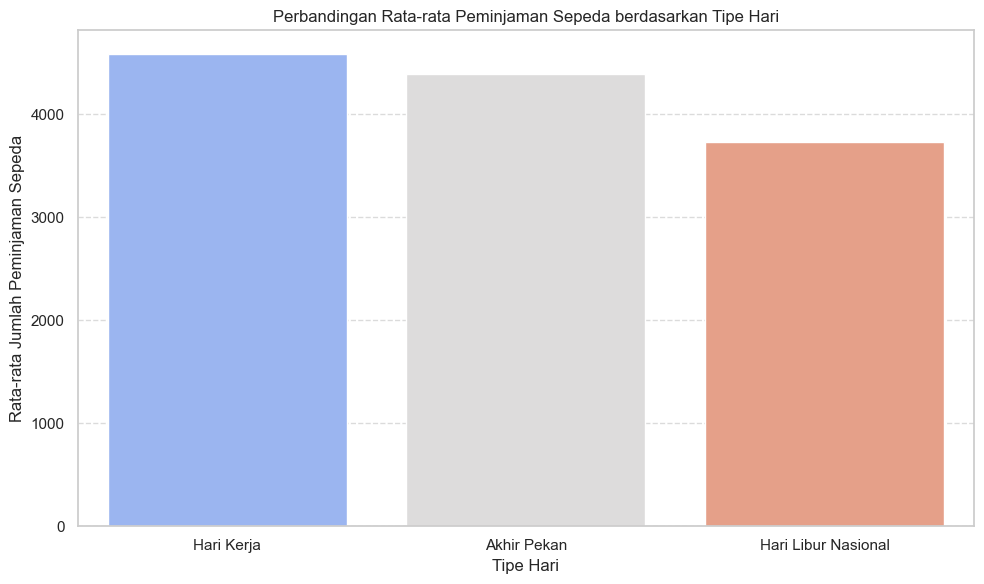

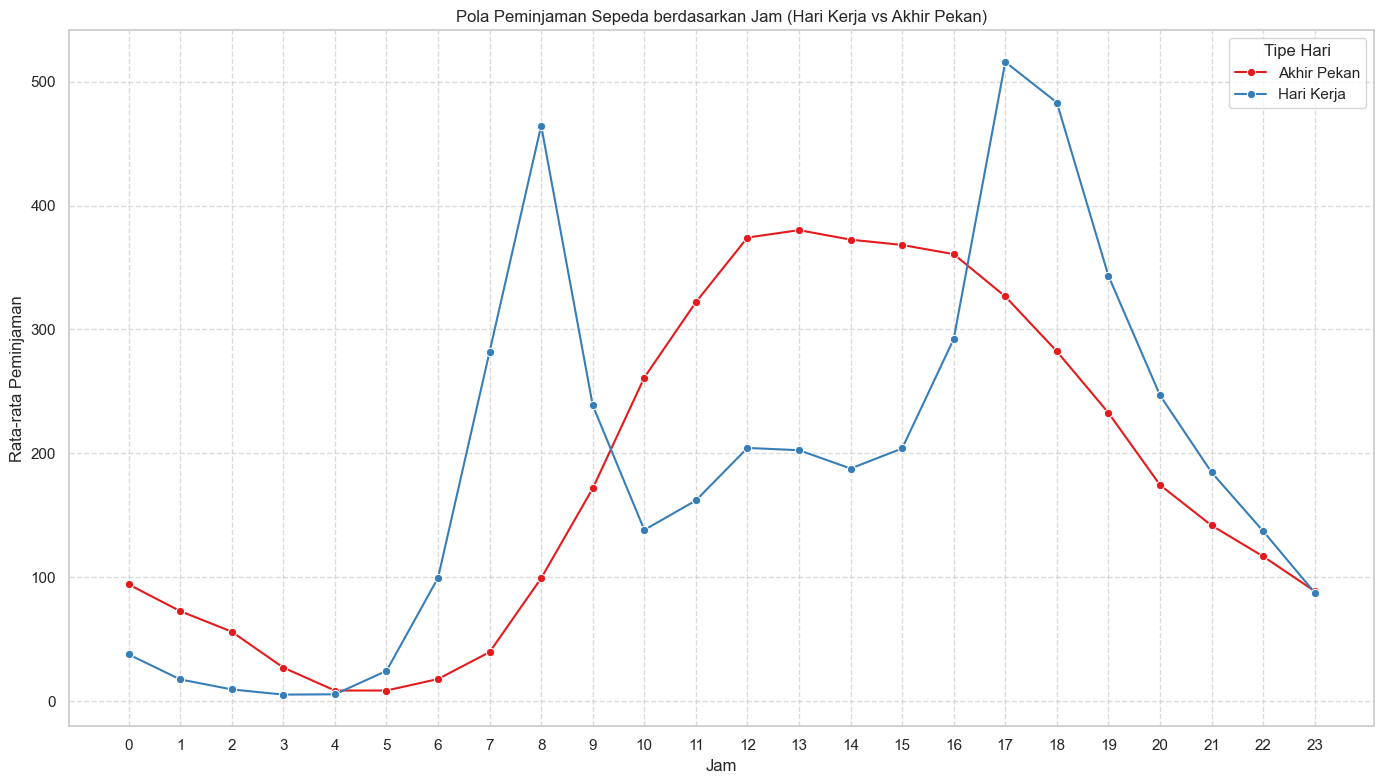

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\2410306491.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casual_group.index, y=casual_group.values, palette='Pastel1')
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\2410306491.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=registered_group.index, y=registered_group.values, palette='Pastel2')


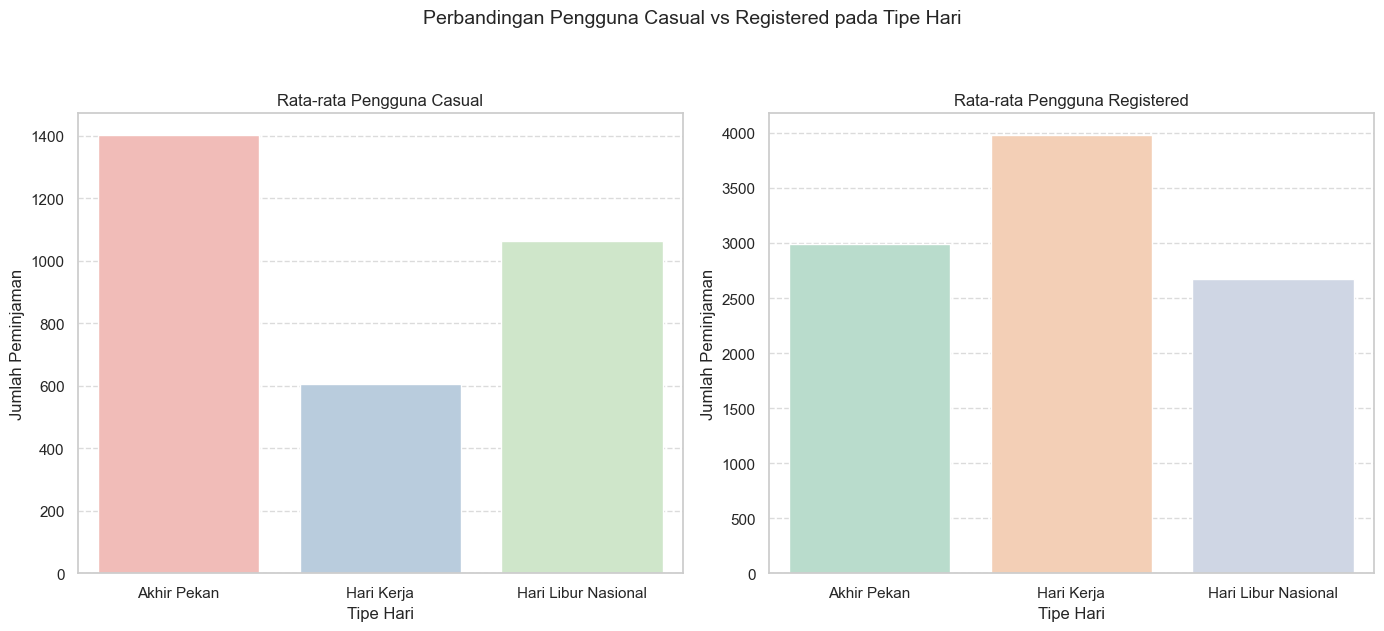

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tambahkan kolom nama hari dan tipe hari
days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
days_df['day_name'] = days_df['weekday'].apply(lambda x: days[x])

# Tipe hari: Hari Libur Nasional, Akhir Pekan (Sabtu/Minggu), Hari Kerja
def label_day_type(row):
    if row['holiday'] == 1:
        return 'Hari Libur Nasional'
    elif row['weekday'] in [0, 6]:  # Minggu dan Sabtu
        return 'Akhir Pekan'
    else:
        return 'Hari Kerja'

days_df['day_type'] = days_df.apply(label_day_type, axis=1)

# 2. Visualisasi rata-rata peminjaman sepeda berdasarkan tipe hari
plt.figure(figsize=(10,6))
avg_by_type = days_df.groupby('day_type')['cnt'].mean().reindex(['Hari Kerja', 'Akhir Pekan', 'Hari Libur Nasional'])

sns.barplot(x=avg_by_type.index, y=avg_by_type.values, palette='coolwarm')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.title('Perbandingan Rata-rata Peminjaman Sepeda berdasarkan Tipe Hari')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

# 3. Visualisasi pola jam per hari kerja vs akhir pekan
hours_df['day_type'] = hours_df['weekday'].apply(lambda x: 'Hari Kerja' if x not in [0, 6] else 'Akhir Pekan')
hourly_pattern = hours_df.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(14,8))
sns.lineplot(data=hourly_pattern, x='hr', y='cnt', hue='day_type', marker='o', palette='Set1')
plt.title('Pola Peminjaman Sepeda berdasarkan Jam (Hari Kerja vs Akhir Pekan)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend(title='Tipe Hari')
plt.tight_layout()
plt.show()

# 4. Visualisasi pengguna casual vs registered pada hari kerja vs akhir pekan
casual_group = days_df.groupby('day_type')['casual'].mean()
registered_group = days_df.groupby('day_type')['registered'].mean()

plt.figure(figsize=(14,6))

# Pengguna Casual
plt.subplot(1, 2, 1)
sns.barplot(x=casual_group.index, y=casual_group.values, palette='Pastel1')
plt.title('Rata-rata Pengguna Casual')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Pengguna Registered
plt.subplot(1, 2, 2)
sns.barplot(x=registered_group.index, y=registered_group.values, palette='Pastel2')
plt.title('Rata-rata Pengguna Registered')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.suptitle('Perbandingan Pengguna Casual vs Registered pada Tipe Hari', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


**Insight:**
1. Perbandingan rata-rata peminjaman sepeda berdasarkan tipe hari
    - Hari kerja memiliki jumlah peminjaman sepeda tertinggi secara rata-rata
    - Akhir pekan berada di urutan kedua
    - Hari libur memiliki rata-rata paling rendah
2. Pola peminjaman sepeda berdasarkan jam (hari kerja vs akhir pekan)
    - Pada hari kerja, terdapat dua puncak peminjaman sepeda : sekitar jam 07.00-09.00 dan 17.00-19.00. Ini mengindentikasikan sepeda digunakan untuk berangkat dan pulang kerja
    - Pada akhir pekan, pola peminjaman lebih merata sepancang hari, dengan sedikit puncak di siang hari (sekitar jam 11.00-16.00)
3. Perbandingan rata-rata tipe pengguna
    - Pengguna casual(non-member) lebih banyak menyewa sepeda di akhir pekan
    - Pengguna registered(member) cenderung menggunakan sepeda lebih sering di hari kerja 


### Pertanyaan 3 : Faktor-faktor apa saja yang memiliki pengeruh terbesar terhadap intensitas penyewaan sepeda?

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1710421448.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


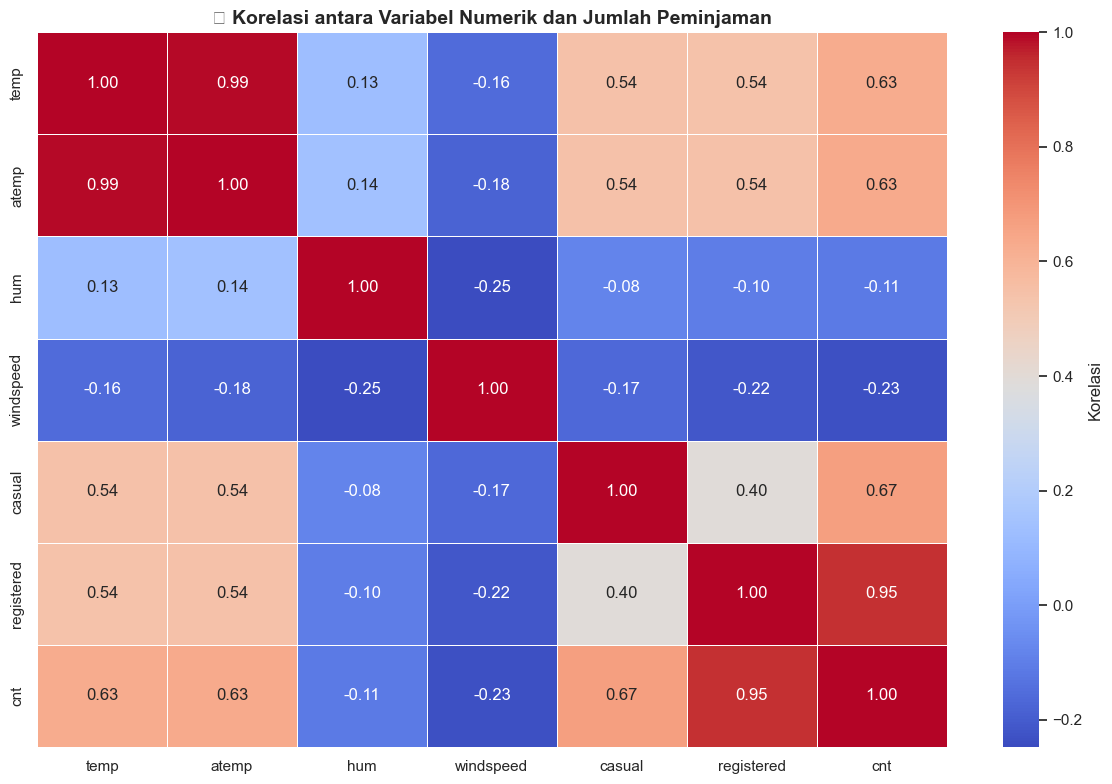

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1710421448.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(vals), y=list(cols), palette='crest')
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1710421448.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


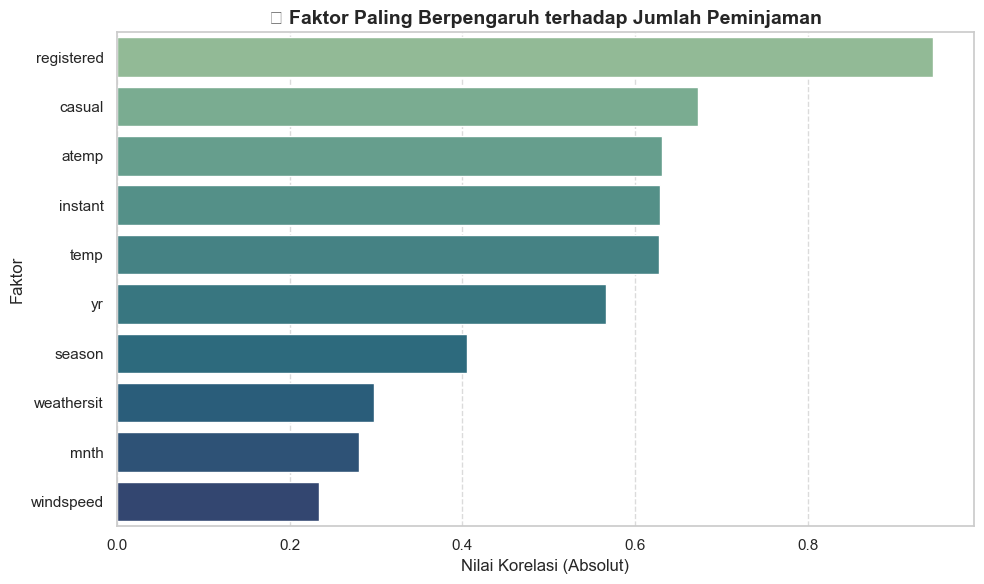

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1710421448.py:56: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1710421448.py:56: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


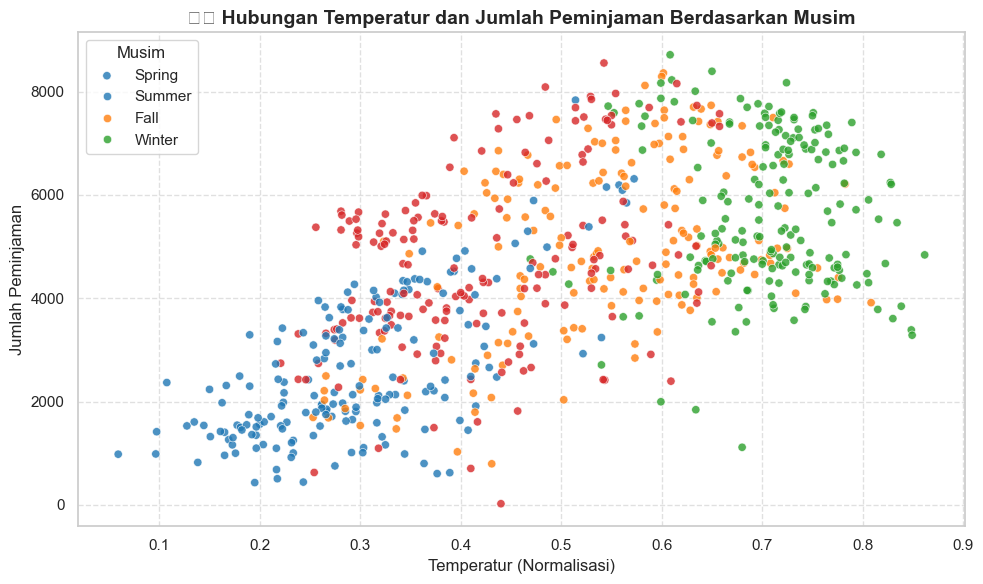

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\1710421448.py:72: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asusR\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


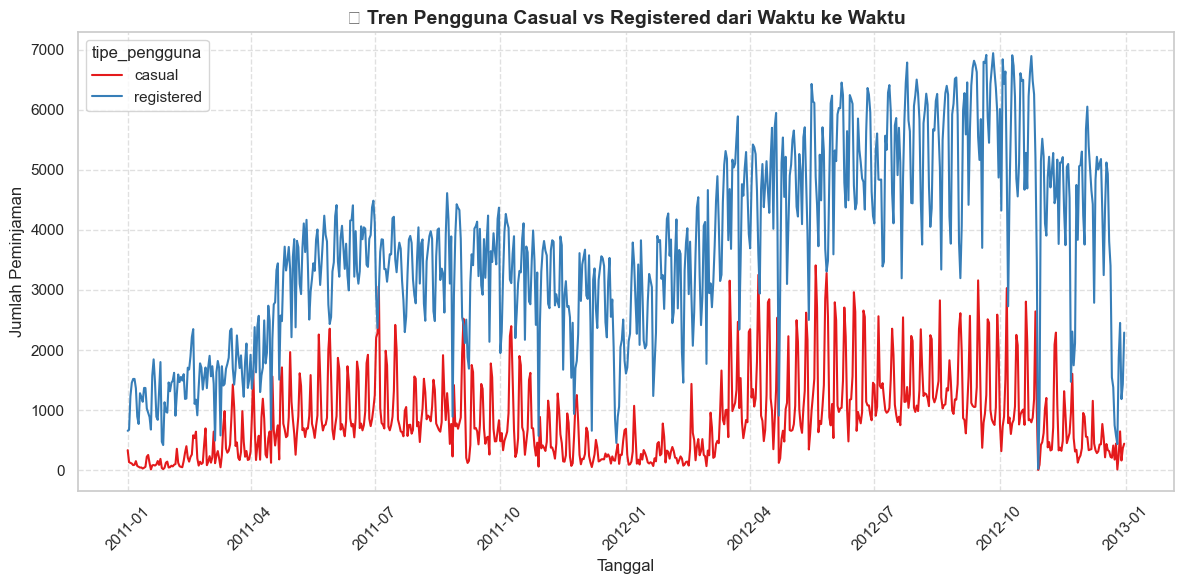

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Set gaya seaborn
sns.set(style="whitegrid")

# 1. Heatmap Korelasi Numerik
plt.figure(figsize=(12, 8))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation = days_df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Korelasi'})
plt.title('\U0001F50D Korelasi antara Variabel Numerik dan Jumlah Peminjaman', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


# 2. Korelasi Absolut Terhadap cnt
corr_values = []
for col in days_df.columns:
    if col != 'cnt' and days_df[col].dtype in ['int64', 'float64']:
        corr, _ = pearsonr(days_df[col], days_df['cnt'])
        corr_values.append((col, abs(corr)))

# Urutkan berdasarkan korelasi absolut
sorted_corr = sorted(corr_values, key=lambda x: x[1], reverse=True)

# Visualisasi barplot
plt.figure(figsize=(10, 6))
cols, vals = zip(*sorted_corr[:10])  # Ambil 10 teratas
sns.barplot(x=list(vals), y=list(cols), palette='crest')
plt.title('\U0001F4CA Faktor Paling Berpengaruh terhadap Jumlah Peminjaman', fontsize=14, weight='bold')
plt.xlabel('Nilai Korelasi (Absolut)')
plt.ylabel('Faktor')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Hubungan Temperatur dan Jumlah Peminjaman (dengan hue musim)
plt.figure(figsize=(10, 6))
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
sns.scatterplot(x='temp', y='cnt', hue='season', data=days_df, palette='tab10', alpha=0.8)
plt.title('\U0001F321\ufe0f Hubungan Temperatur dan Jumlah Peminjaman Berdasarkan Musim', fontsize=14, weight='bold')
plt.xlabel('Temperatur (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim', labels=season_labels)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Tren Pengguna Casual vs Registered Sepanjang Waktu
plt.figure(figsize=(12, 6))
day_df_melted = pd.melt(days_df, id_vars=['dteday'], value_vars=['casual', 'registered'], 
                        var_name='tipe_pengguna', value_name='jumlah')
sns.lineplot(data=day_df_melted, x='dteday', y='jumlah', hue='tipe_pengguna', palette='Set1')
plt.title('\U0001F4C8 Tren Pengguna Casual vs Registered dari Waktu ke Waktu', fontsize=14, weight='bold')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**Insight:**
1. Korelasi antara varaibel numerik dan jumlah peminjaman
    - Peminjaman sepeda sangat dipengaruhi oleh jumlah pengguna registered dan casul, dengan registered menjadi pendorong utama 
    - temp dan atemp memiliki korelasi kuat(positif), menunjukkan semakin hangat cuaca, semakin banyak orang menyewa sepeda
    - humadity dan windspeed menunjukkan korelasi negatif kecil
2. Faktor paling berpengaruh terhadap jumlah pesanan
    - Faktor paling berpengaruh : registered(nilai korelasi = 0,9),casual(0,6), temp(0,6), dan atemp(0,6).
    - Pengaruh yang negatif : hum(-0,1), dan windspeed(-0,2)
3. Hubungan temperatur dengan jumlah peminjaman
    - Semakin tinggi suhu, semakin tinggi intensitas peminjaman, terutama di musim panas dan gugur
4. Tren pengguna registered dengan casual
    - Pengguna terdaftar lebih dominan (3000-7000/hari) dibandingkan dengan pengguna casual yang cenderung naik pada akhir pekan atau musim liburan (berkisar 500-4000/hari)

# Analisis Lanjutan RFM


C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='RFM_score', data=rfm_weekday, palette='cubehelix', order=days)


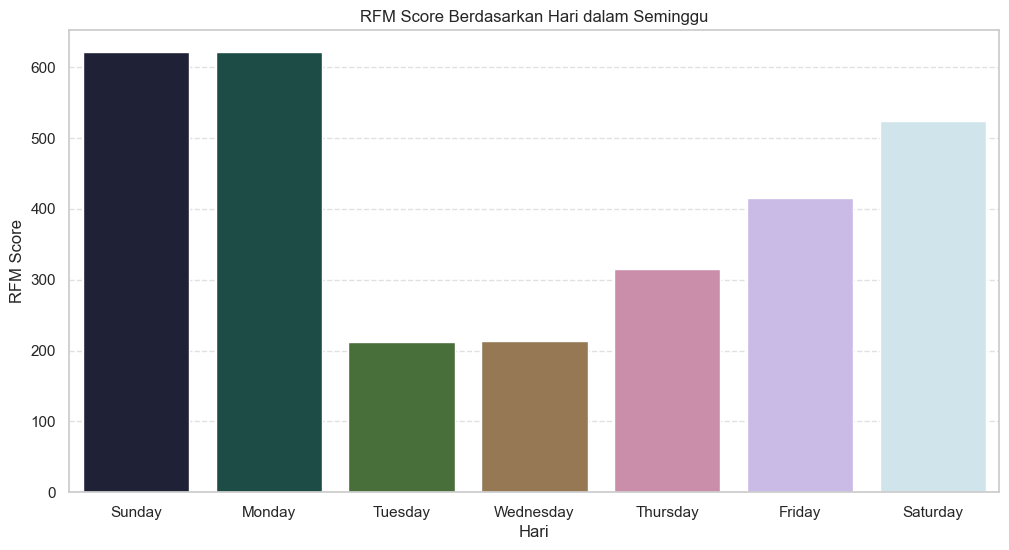

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='R_score', data=rfm_weekday, palette='Blues', order=days)
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='F_score', data=rfm_weekday, palette='Greens', order=days)
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday_name', y='M_score', data=rfm_weekday,

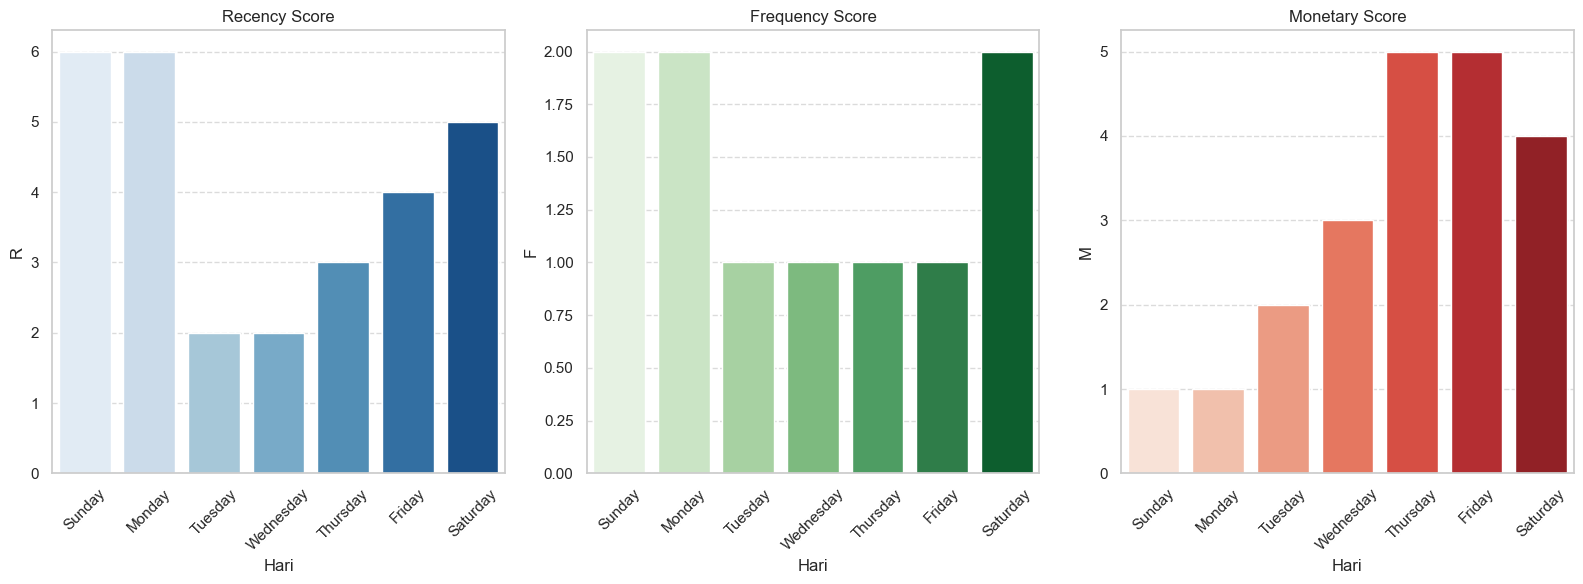

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='RFM_score', data=rfm_season, palette='coolwarm')


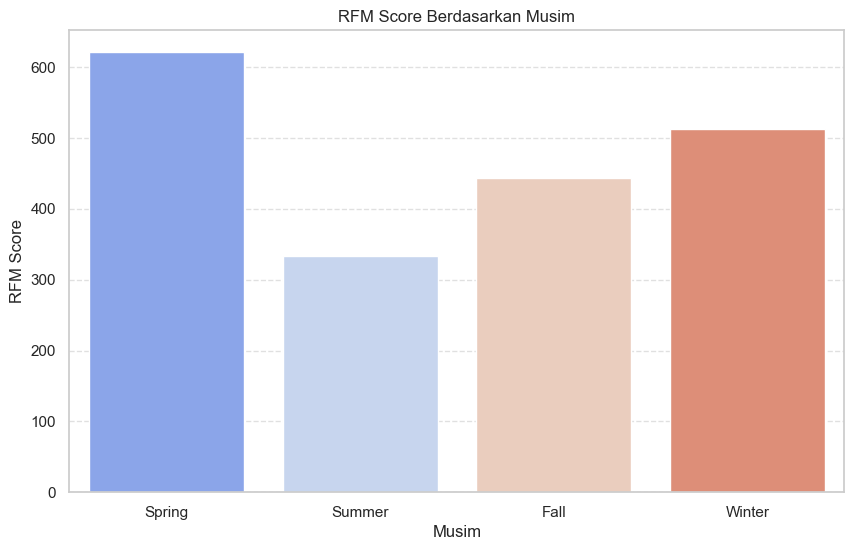

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='R_score', data=rfm_season, palette='Blues')
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='F_score', data=rfm_season, palette='Greens')
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='M_score', data=rfm_season, palette='Reds')


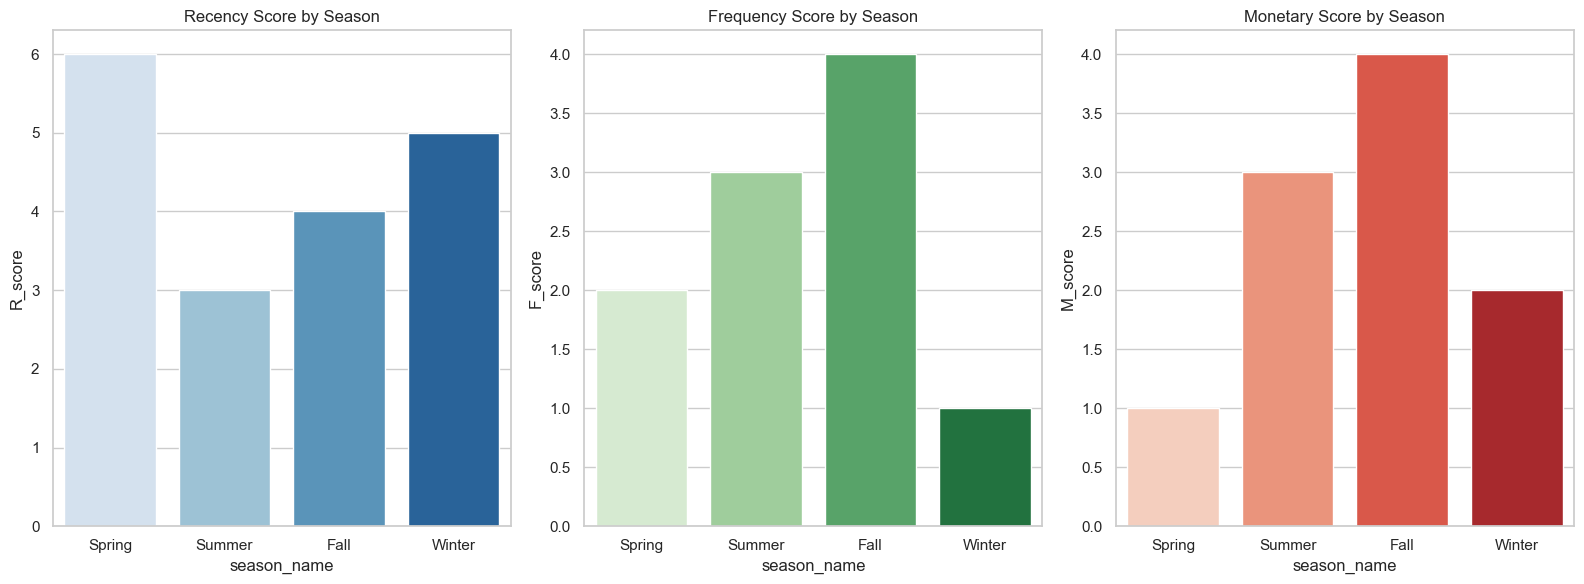

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='RFM_score', data=rfm_weather, palette='cubehelix')


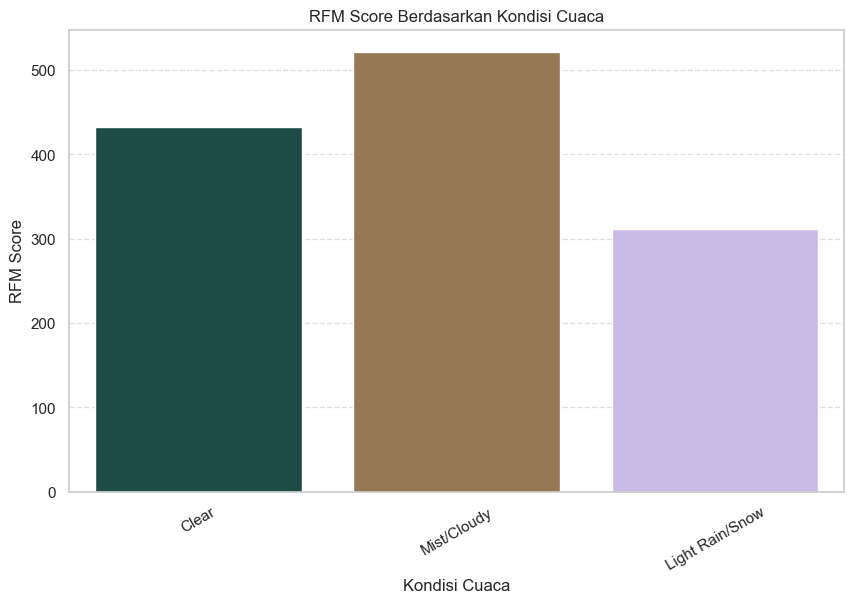

C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='R_score', data=rfm_weather, palette='Blues')
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='F_score', data=rfm_weather, palette='Greens')
C:\Users\asusR\AppData\Local\Temp\ipykernel_21476\4005299486.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_condition', y='M_score', data=rfm_weather, palet

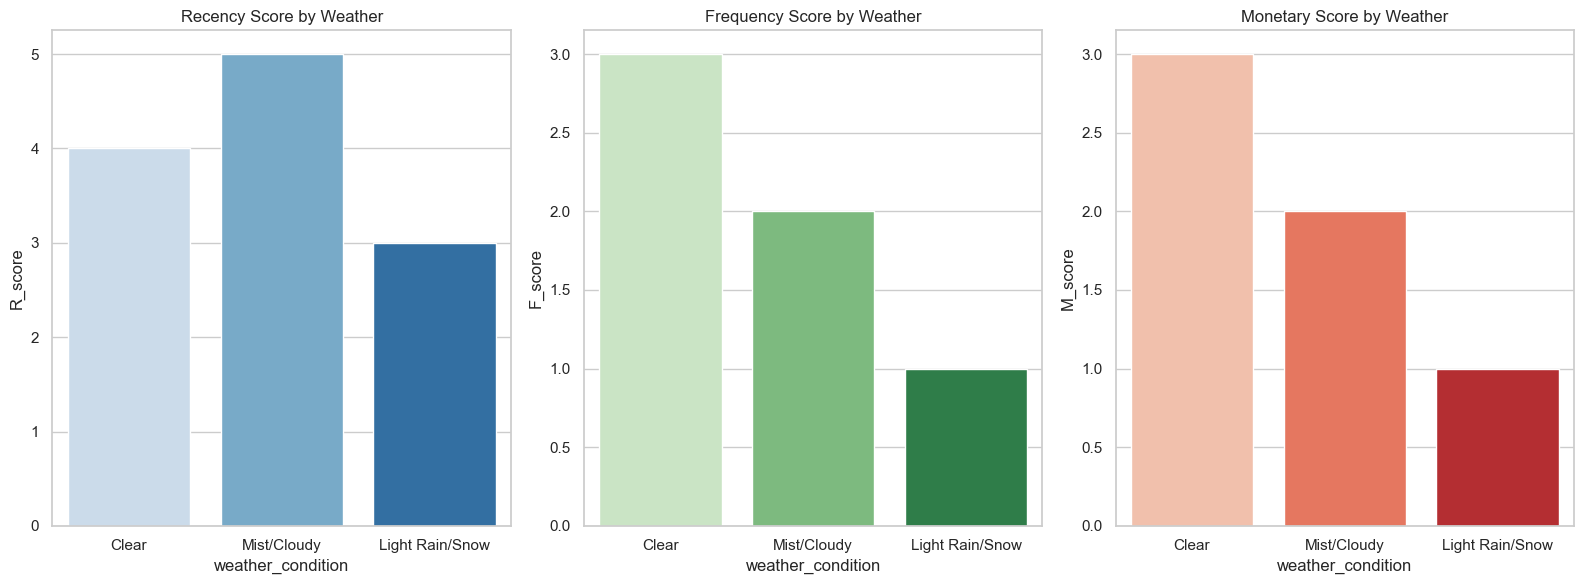

In [34]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# --- Analisis RFM Berdasarkan Hari dalam Seminggu ---
rfm_weekday = days_df.groupby('weekday').agg({
    'dteday': lambda x: (days_df['dteday'].max() - x.max()).days,
    'cnt': ['count', 'mean', 'sum']
}).reset_index()

rfm_weekday.columns = ['weekday', 'recency_days', 'frequency', 'avg_rentals', 'total_rentals']
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
rfm_weekday['weekday_name'] = rfm_weekday['weekday'].apply(lambda x: days[x])

# Normalisasi skor RFM (1-5)
rfm_weekday['R_score'] = 6 - pd.qcut(rfm_weekday['recency_days'], 5, labels=False, duplicates='drop')
rfm_weekday['F_score'] = 1 + pd.qcut(rfm_weekday['frequency'], 5, labels=False, duplicates='drop')
rfm_weekday['M_score'] = 1 + pd.qcut(rfm_weekday['total_rentals'], 5, labels=False, duplicates='drop')
rfm_weekday['RFM_score'] = rfm_weekday['R_score']*100 + rfm_weekday['F_score']*10 + rfm_weekday['M_score']

# Visualisasi RFM berdasarkan Hari
plt.figure(figsize=(12,6))
sns.barplot(x='weekday_name', y='RFM_score', data=rfm_weekday, palette='cubehelix', order=days)
plt.title('RFM Score Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('RFM Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- Komponen R, F, M Hari ---
plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
sns.barplot(x='weekday_name', y='R_score', data=rfm_weekday, palette='Blues', order=days)
plt.title('Recency Score')
plt.xlabel('Hari')
plt.ylabel('R')
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 3, 2)
sns.barplot(x='weekday_name', y='F_score', data=rfm_weekday, palette='Greens', order=days)
plt.title('Frequency Score')
plt.xlabel('Hari')
plt.ylabel('F')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.subplot(1, 3, 3)
sns.barplot(x='weekday_name', y='M_score', data=rfm_weekday, palette='Reds', order=days)
plt.title('Monetary Score')
plt.xlabel('Hari')
plt.ylabel('M')
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()


# --- RFM Berdasarkan Musim ---
seasons = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
rfm_season = days_df.groupby('season').agg({
    'dteday': lambda x: (days_df['dteday'].max() - x.max()).days,
    'cnt': ['count', 'mean','sum']
}).reset_index()

rfm_season.columns = ['season', 'recency_days', 'frequency', 'avg_rentals', 'total_rentals']
rfm_season['season_name'] = rfm_season['season'].apply(lambda x: seasons[x])
rfm_season['R_score'] = 6 - pd.qcut(rfm_season['recency_days'], 4, labels=False, duplicates='drop')
rfm_season['F_score'] = 1 + pd.qcut(rfm_season['frequency'], 4, labels=False, duplicates='drop')
rfm_season['M_score'] = 1 + pd.qcut(rfm_season['total_rentals'], 4, labels=False, duplicates='drop')
rfm_season['RFM_score'] = rfm_season['R_score']*100 + rfm_season['F_score']*10 + rfm_season['M_score']

plt.figure(figsize=(10,6))
sns.barplot(x='season_name', y='RFM_score', data=rfm_season, palette='coolwarm')
plt.title('RFM Score Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('RFM Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
sns.barplot(x='season_name', y='R_score', data=rfm_season, palette='Blues')
plt.title('Recency Score by Season')

plt.subplot(1, 3, 2)
sns.barplot(x='season_name', y='F_score', data=rfm_season, palette='Greens')
plt.title('Frequency Score by Season')

plt.subplot(1, 3, 3)
sns.barplot(x='season_name', y='M_score', data=rfm_season, palette='Reds')
plt.title('Monetary Score by Season')

plt.tight_layout()
plt.show()

# --- RFM Berdasarkan Cuaca ---
weather_conditions = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
rfm_weather = days_df.groupby('weathersit').agg({
    'dteday': lambda x: (days_df['dteday'].max() - x.max()).days,
    'cnt': ['count', 'mean','sum']
}).reset_index()

rfm_weather.columns = ['weathersit', 'recency_days', 'frequency', 'avg_rentals', 'total_rentals']
rfm_weather['weather_condition'] = rfm_weather['weathersit'].apply(lambda x: weather_conditions[x])
rfm_weather['R_score'] = 6 - rfm_weather['recency_days'].rank(method='dense')
rfm_weather['F_score'] = rfm_weather['frequency'].rank(method='dense')
rfm_weather['M_score'] = rfm_weather['total_rentals'].rank(method='dense')
rfm_weather['RFM_score'] = rfm_weather['R_score']*100 + rfm_weather['F_score']*10 + rfm_weather['M_score']

plt.figure(figsize=(10,6))
sns.barplot(x='weather_condition', y='RFM_score', data=rfm_weather, palette='cubehelix')
plt.title('RFM Score Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('RFM Score')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(16,6))

plt.subplot(1, 3, 1)
sns.barplot(x='weather_condition', y='R_score', data=rfm_weather, palette='Blues')
plt.title('Recency Score by Weather')

plt.subplot(1, 3, 2)
sns.barplot(x='weather_condition', y='F_score', data=rfm_weather, palette='Greens')
plt.title('Frequency Score by Weather')

plt.subplot(1, 3, 3)
sns.barplot(x='weather_condition', y='M_score', data=rfm_weather, palette='Reds')
plt.title('Monetary Score by Weather')

plt.tight_layout()
plt.show()


**Insight:**
Analisis RFM
1. Berdasarkan hari dalam seminggu
    - Aktifitas peminjaman sepeda paling baru terjadi pada hari Minggu dan Senin (kisaran RFM 600), menandakan pelanggan baru aktif di hari tersebut
    - Hari-hari kerja seperti Selasa & Rabu punya skor rendah (kisaran 200), artinya pelanggan sudah cukup lama tidak aktif di hari-hari ini.
    - Recency Score tertinggi pada hari Minggu dan Sabtu, menandakan bahwa aktivitas peminjaman terbaru sering terjadi di akhir pekan.
    - Frequency & Monetary Score juga tinggi di hari Sabtu dan Jumat, menunjukkan pengguna lebih sering dan lebih banyak meminjam di hari tersebut.
2. Berdasarkan musim
    - Musim Gugur (Fall) mendominasi semua aspek RFM, menunjukkan puncak aktivitas peminjaman.
    - Musim Dingin (Winter) memiliki skor RFM paling rendah kemungkinan karena cuaca menghambat aktivitas.
3. Berdasarkan cuaca
    - Saat cuaca Clear atau Mist/Cloudy, nilai RFM jauh lebih tinggi dibanding kondisi hujan/salju.
    - Cuaca buruk mengurangi frekuensi dan jumlah transaksi secara signifikan.

**Implikasi Strategis:**
- **Optimasi Alokasi Sepeda & Operasional:** Fokuskan ketersediaan sepeda dan dukungan operasional di hari-hari dengan skor RFM tinggi seperti hari Sabtu, Minggu dan Seni, terutama saat musim Gugur dan cuaca cerah, karena permintaan cenderung tinggi.

- **Pengembangan Segmen Bernilai Rendah:** Buat program insentif atau promosi khusus untuk mendorong peminjaman di hari Senin atau pada musim Semi, di mana aktivitas pengguna tergolong rendah.

- **Perencanaan Berdasarkan Musim:** Terapkan pendekatan berbeda untuk tiap musim, disesuaikan dengan pola perilaku pengguna berdasarkan skor RFM.

- **Strategi Antisipasi Cuaca:** Kembangkan solusi untuk mengurangi dampak penurunan peminjaman saat cuaca kurang mendukung (misalnya hujan), seperti layanan fleksibel atau promosi khusus.

Analisis RFM ini menjadi fondasi dalam pengambilan keputusan berbasis data untuk mendukung efisiensi operasional, perencanaan kapasitas sepeda, serta merancang strategi pemasaran yang tepat sasaran pada layanan peminjaman sepeda.

# Conculution

Berdasarkan dari proses analisis data yang telah dilakukan. Berikut adalah informasi dan jawaban yang diperoleh untuk menjawab pertanyaan bisnis yang dirumuskan berdasarkan data frame yang ada :

### 1. Bagaimana penggunaan sepeda berubah seiring dengan variasi musim dan kondisi cuaca?**
   - **Pergantian musim: menunjukkan perubahan tren yang jelas. Musim gugur(fall) menjadi musim paling aktif (rata-rata 5.600/hari), sementara musim Semi(spring) menjadi yang paling sedikit (rata-rata 3.500/hari), dengan gap hingga 40%
   - **Kondisi cuaca:**, jika kondisi cuaca buruk maka terjadi penurunan bertahap dalam jumlah peminjaman. Dalam kondisi hujan ringan/salju, penurunan mencapai 32% dibandingkan cuaca cerah.
   - **Interaksi musim dan cuaca:** menunjukkan dampak yang lebih dalam: pada musim Dingin, cuaca buruk dapat menurunkan jumlah peminjaman hingga 47%.
   - **Tren bulanan:** puncak aktivitas terjadi antara Juni–September, dengan angka tertinggi pada September (rata-rata 5.900/hari). Sebaliknya, penurunan drastis terjadi pada Januari (rata-rata 2.500) dan Desember (sekitar 2.600).

### 2. Bagimana perbedaan perilaku penyewaan sepeda antara hari kerja, hari libur dan akhir pekan. Dan bagaimana pula perbedaan perilaku penyewaan sepeda antara pengguna casual dan pengguna registered berdasarkan tipe hari?
- **Hari kerja** didominasi oleh pola jam sibuk, dengan lonjakan di pagi hari (07.00–09.00) dan sore hari (17.00–19.00), mencerminkan penggunaan untuk keperluan komuter (400–450 peminjaman/jam).
- **Hari libur** menunjukkan distribusi waktu yang lebih stabil, dengan puncak di siang hari (11.00–15.00) dan rata-rata sekitar 300 peminjaman/jam.
- **Dari sisi pengguna:**
    **Registered users** sangat aktif di hari kerja (rata-rata 3.760 peminjaman/hari),
    sementara **casual users** cenderung meningkat hingga 87% pada akhir pekan dibandingkan hari biasa.Rasio antara registered dan casual users pada hari kerja adalah 6:1, dan turun ke 2:1 pada hari libur.
- **Dilihat dari masing-masing hari:**
    - **Kamis dan Jumat** menjadi hari paling aktif dengan skor RFM masing-masing 531 dan 522.
    - **Senin** menjadi hari dengan aktivitas terendah di antara hari kerja (RFM: 114).
    - Saat **libur nasional**, jumlah peminjaman bisa menurun hingga 40% dibandingkan hari biasa.

### 3. Faktor-faktor apa saja yang memiliki pengeruh terbesar terhadap intensitas penyewaan sepeda?
- **Temperatur:**menjadi variabel paling berpengaruh dengan korelasi positif yang cukup kuat (r ≈ 0,6). Aktivitas peminjaman meningkat secara signifikan saat suhu berada dalam rentang yang nyaman.
- **Perbandingan antar tahun** menunjukkan peningkatan peminjaman sekitar 50% dari tahun 2011 ke 2012, menandakan adanya pertumbuhan signifikan dalam penggunaan layanan.
- **Musim:** gugur mencatat jumlah peminjaman tertinggi (rata-rata 5.600 per hari), diikuti oleh Panas (5.051), Dingin (4.041), dan terakhir Semi (3.529).
- **Kelembapan udara** berkorelasi negatif secara moderat (r ≈ -0,1), di mana tingkat kelembapan tinggi cenderung menurunkan minat bersepeda.
- **Cuaca** memiliki dampak signifikan terhadap minat pengguna. Pada hari cerah, peminjaman rata-rata mencapai 5.062 per hari, sedangkan saat hujan/salju ringan turun ke 3.422.
- **Tipe pengguna** juga memengaruhi volume: pengguna registered menyumbang sekitar 77,2% dari total transaksi, menunjukkan dominasi pengguna setia dan reguler.



In [ ]:
#days_df.to_csv("days_df.csv", index=False)
#hours_df.to_csv("hour_df.csv", index=False)